In [1]:
import numpy as np
import pandas as pd


# 1. Combine all images and create a dataframe for original image

In [162]:
file_path_list=["/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 1-7 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 8-24 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 25-35 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 36-55 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 56-75 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/life3-aut0/20220224_1032621/images 76-100 revised/annotations/instances_default.json"]

In [163]:
from pathlib import Path, PurePath
from typing import Dict, List, Tuple
from json import load

def _load_coco_annotations(path_to_coco_annot: PurePath) -> Dict:
    """
    Loads COCO annotations from the file path provided.

    Args:
        path_to_coco_annot (PurePath): File path to COCO annotations file

    Returns:
        A dictionary representation of the COCO annotations file.
    """
    with open(path_to_coco_annot, "r") as f:
        coco_annotation = load(f)

    return coco_annotation

In [164]:
df_concat_list = []

#_convert_raw_annotations
for annot_file_path in file_path_list:
    coco_annotations = _load_coco_annotations(annot_file_path)

    image_info = coco_annotations["images"]
    df_images = pd.DataFrame(image_info)
    df_images.set_index("id", inplace=True)
    # df_images.drop(
    #     labels=["license", "flickr_url", "coco_url", "date_captured"],
    #     axis=1,
    #     inplace=True,
    # )

    categories_mapping = coco_annotations["categories"]
    df_cat = pd.DataFrame(categories_mapping)
    df_cat.rename(mapper={"name": "category_name"}, axis=1, inplace=True)
    df_cat.drop(labels=["supercategory"], axis=1, inplace=True)

    annotations = coco_annotations["annotations"]
    print(f"Number of annotations: {len(annotations)}")
    df_annot = pd.DataFrame(annotations)
    df_annot.set_index("id", inplace=True)
    df_annot.drop(
        # labels=["segmentation", "iscrowd", "attributes"], axis=1, inplace=True
        labels=["segmentation", "iscrowd"],
        axis=1,
        inplace=True,
    )

    final_df = df_annot.merge(df_images, left_on="image_id", right_on="id")
    final_df = final_df.merge(df_cat, left_on="category_id", right_on="id")
    final_df.drop(labels=["id"], axis=1, inplace=True)
    df_concat_list.append(final_df)

Number of annotations: 4281
Number of annotations: 2686
Number of annotations: 1182
Number of annotations: 3030
Number of annotations: 3327
Number of annotations: 3234


In [5]:
display(df_concat_list)

[      image_id  category_id       area                             bbox  \
 0            1            1    96.2000     [1076.49, 1072.6, 13.0, 7.4]   
 1            1            1   258.2250     [1149.7, 972.5, 15.65, 16.5]   
 2            1            1   121.2000    [1104.44, 904.66, 12.0, 10.1]   
 3            1            1   210.0000    [1194.39, 843.98, 15.0, 14.0]   
 4            1            1   152.9500    [1057.62, 681.55, 11.5, 13.3]   
 ...        ...          ...        ...                              ...   
 4276         7            3   730.0020      [786.1, 293.5, 24.83, 29.4]   
 4277         7            3  2186.6645   [802.19, 403.37, 57.65, 37.93]   
 4278         7            3  1855.2402   [1246.3, 480.62, 46.98, 39.49]   
 4279         7            3  1207.7668  [1216.76, 196.93, 32.66, 36.98]   
 4280         7            2  2128.1984    [748.75, 248.4, 61.12, 34.82]   
 
                attributes  width  height  \
 0     {'occluded': False}   1920    1080

In [6]:
concatenated_df = pd.concat(df_concat_list, ignore_index=True)
concatenated_df


,image_id,category_id,area,bbox,attributes,width,height,file_name,license,flickr_url,coco_url,date_captured,category_name
0,1,1,96.200,"[1076.49, 1072.6, 13.0, 7.4]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells
1,1,1,258.225,"[1149.7, 972.5, 15.65, 16.5]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells
2,1,1,121.200,"[1104.44, 904.66, 12.0, 10.1]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells
3,1,1,210.000,"[1194.39, 843.98, 15.0, 14.0]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells
4,1,1,152.950,"[1057.62, 681.55, 11.5, 13.3]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17735,19,3,256.289,"[1620.04, 190.3, 20.26, 12.65]",{'occluded': False},1920,1080,81.jpg,0,,,0,cell accumulation (large cells)
17736,20,3,596.960,"[1839.4, 708.2, 32.8, 18.2]",{'occluded': False},1920,1080,80.jpg,0,,,0,cell accumulation (large cells)
17737,22,3,1518.440,"[966.92, 442.68, 40.6, 37.4]",{'occluded': False},1920,1080,78.jpg,0,,,0,cell accumulation (large cells)
17738,23,3,1417.400,"[884.28, 446.39, 38.0, 37.3]",{'occluded': False},1920,1080,77.jpg,0,,,0,cell accumulation (large cells)


In [7]:
concatenated_df.shape

(17740, 13)

In [8]:
len(concatenated_df.file_name.unique())

99

# Metadata dataframe EDA

In [9]:
df_metadata = pd.read_excel('/Users/dylanpoh/Documents/AIsingapore/GitHub/data/Metadata list for AI Singapore final.xlsx', engine='openpyxl')
df_metadata

,No,Filename,Path or folder,Incubation day,Dilution Factor (unit),Optical Density
0,1,1 c0.7L d5 20x undilut OD15,images 1-7 revised,5,undiluted,15.000
1,2,2 c0.7L d5 20x 100xdilut OD15,images 1-7 revised,5,100,0.150
2,3,3 c10L d10 20x undilut OD8,images 1-7 revised,10,undiluted,8.000
3,4,4 c1 from agar plate 100mL bottle d1 20x undilut,images 1-7 revised,1,undiluted,NaN
4,5,5 c2 from agar plate 100mL bottle d1 20x undilut,images 1-7 revised,1,undiluted,NaN
...,...,...,...,...,...,...
95,96,96,images 76-100 revised,8,100,0.206
96,97,97,images 76-100 revised,8,30,0.437
97,98,98,images 76-100 revised,8,100,0.144
98,99,99,images 76-100 revised,8,30,0.499


In [10]:
df_metadata['Filename']=df_metadata['Filename'].astype(str)
df_metadata['Filename'][8]

'9'

In [11]:
df_metadata[df_metadata['Filename'] == '8']

,No,Filename,Path or folder,Incubation day,Dilution Factor (unit),Optical Density
7,8,8,images 8-24 revised,1,undiluted,NaN


In [12]:
print(df_metadata.info())
df_metadata.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      100 non-null    int64  
 1   Filename                100 non-null    object 
 2   Path or folder          100 non-null    object 
 3   Incubation day          100 non-null    int64  
 4   Dilution Factor (unit)  100 non-null    object 
 5   Optical Density         76 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None


No                        100
Filename                  100
Path or folder              6
Incubation day              8
Dilution Factor (unit)      5
Optical Density            65
dtype: int64

In [13]:
for name in df_metadata.columns[3:]: 
    print(f'{name} : {df_metadata[name].unique()}')

Incubation day : [ 5 10  1  2  3  4  8  7]
Dilution Factor (unit) : ['undiluted' 100 5 10 30]
Optical Density : [15.     0.15   8.       nan  0.66   0.132  0.655  0.46   0.131  0.092
  1.095  1.04   0.96   0.93   0.219  0.208  0.192  0.186  0.575  0.585
  0.49   0.78   0.525  0.47   2.155  0.498  0.431  0.25   0.215  2.925
  0.502  0.293  0.79   0.815  0.7    1.5    0.755  0.685  0.572  0.178
  0.532  0.699  0.237  0.242  0.688  0.707  0.26   0.944  0.367  0.297
  0.937  0.371  0.34   0.12   3.4    0.466  0.155  0.58   0.206  0.56
  0.18   0.631  0.437  0.144  0.499  0.16 ]


In [14]:
df_metadata.replace({'undiluted': 0, np.nan: 0}, inplace=True)

In [15]:
print(df_metadata.info())
print(df_metadata.nunique())
for name in df_metadata.columns[3:]: 
    print(f'{name} : {df_metadata[name].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      100 non-null    int64  
 1   Filename                100 non-null    object 
 2   Path or folder          100 non-null    object 
 3   Incubation day          100 non-null    int64  
 4   Dilution Factor (unit)  100 non-null    int64  
 5   Optical Density         100 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB
None
No                        100
Filename                  100
Path or folder              6
Incubation day              8
Dilution Factor (unit)      5
Optical Density            66
dtype: int64
Incubation day : [ 5 10  1  2  3  4  8  7]
Dilution Factor (unit) : [  0 100   5  10  30]
Optical Density : [15.     0.15   8.     0.     0.66   0.132  0.655  0.46   0.131  0.092
  1.095  1.04   0.96   0.93   0.21

In [16]:
df_metadata.rename(columns={'Incubation day': 'incubation_day', 'Dilution Factor (unit)': 'dilution_factor', 'Optical Density': 'optical_density'}, inplace=True)
selected_col=['Filename','incubation_day','dilution_factor','optical_density']

# Merge concatenated_df and metadata information

In [17]:
concatenated_df['file_name_split']=concatenated_df.file_name.str.rsplit('.',n=1, expand=True)[0]
concatenated_df

,image_id,category_id,area,bbox,attributes,width,height,file_name,license,flickr_url,coco_url,date_captured,category_name,file_name_split
0,1,1,96.200,"[1076.49, 1072.6, 13.0, 7.4]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
1,1,1,258.225,"[1149.7, 972.5, 15.65, 16.5]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
2,1,1,121.200,"[1104.44, 904.66, 12.0, 10.1]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
3,1,1,210.000,"[1194.39, 843.98, 15.0, 14.0]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
4,1,1,152.950,"[1057.62, 681.55, 11.5, 13.3]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17735,19,3,256.289,"[1620.04, 190.3, 20.26, 12.65]",{'occluded': False},1920,1080,81.jpg,0,,,0,cell accumulation (large cells),81
17736,20,3,596.960,"[1839.4, 708.2, 32.8, 18.2]",{'occluded': False},1920,1080,80.jpg,0,,,0,cell accumulation (large cells),80
17737,22,3,1518.440,"[966.92, 442.68, 40.6, 37.4]",{'occluded': False},1920,1080,78.jpg,0,,,0,cell accumulation (large cells),78
17738,23,3,1417.400,"[884.28, 446.39, 38.0, 37.3]",{'occluded': False},1920,1080,77.jpg,0,,,0,cell accumulation (large cells),77


In [18]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17740 entries, 0 to 17739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_id         17740 non-null  int64  
 1   category_id      17740 non-null  int64  
 2   area             17740 non-null  float64
 3   bbox             17740 non-null  object 
 4   attributes       17740 non-null  object 
 5   width            17740 non-null  int64  
 6   height           17740 non-null  int64  
 7   file_name        17740 non-null  object 
 8   license          17740 non-null  int64  
 9   flickr_url       17740 non-null  object 
 10  coco_url         17740 non-null  object 
 11  date_captured    17740 non-null  int64  
 12  category_name    17740 non-null  object 
 13  file_name_split  17740 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.9+ MB


In [19]:
merged_left = pd.merge(left=concatenated_df, right=df_metadata[selected_col], how='left', left_on='file_name_split', right_on='Filename')
# merged_left.drop(['file_name_split','Filename'],axis=1,inplace=True)
merged_left

,image_id,category_id,area,bbox,attributes,width,height,file_name,license,flickr_url,coco_url,date_captured,category_name,file_name_split,Filename,incubation_day,dilution_factor,optical_density
0,1,1,96.200,"[1076.49, 1072.6, 13.0, 7.4]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
1,1,1,258.225,"[1149.7, 972.5, 15.65, 16.5]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
2,1,1,121.200,"[1104.44, 904.66, 12.0, 10.1]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
3,1,1,210.000,"[1194.39, 843.98, 15.0, 14.0]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
4,1,1,152.950,"[1057.62, 681.55, 11.5, 13.3]",{'occluded': False},1920,1080,7 c4 from agar plate 100mL bottle d1 20x undil...,0,,,0,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17735,19,3,256.289,"[1620.04, 190.3, 20.26, 12.65]",{'occluded': False},1920,1080,81.jpg,0,,,0,cell accumulation (large cells),81,81,7,30,0.367
17736,20,3,596.960,"[1839.4, 708.2, 32.8, 18.2]",{'occluded': False},1920,1080,80.jpg,0,,,0,cell accumulation (large cells),80,80,7,10,0.944
17737,22,3,1518.440,"[966.92, 442.68, 40.6, 37.4]",{'occluded': False},1920,1080,78.jpg,0,,,0,cell accumulation (large cells),78,78,7,10,0.707
17738,23,3,1417.400,"[884.28, 446.39, 38.0, 37.3]",{'occluded': False},1920,1080,77.jpg,0,,,0,cell accumulation (large cells),77,77,8,100,0.688


In [180]:
merged_left.isnull().sum().sum()

0

In [21]:
# print(merged_left.info())
print(merged_left[merged_left.columns[15:18]].nunique())
for name in merged_left.columns[15:18]: 
    print(f'{name} : {merged_left[name].unique()}')

incubation_day      7
dilution_factor     5
optical_density    65
dtype: int64
incubation_day : [1 5 3 2 4 8 7]
dilution_factor : [  0 100   5  10  30]
optical_density : [ 0.     0.15  15.     0.655  0.132  0.66   0.092  0.131  0.46   0.25
  0.431  0.498  2.155  0.47   0.525  0.575  0.78   0.49   0.585  0.186
  0.192  0.208  0.219  0.93   0.96   1.04   1.095  0.237  0.699  2.925
  0.532  0.178  0.572  0.685  0.755  1.5    0.7    0.815  0.79   0.293
  0.502  0.215  0.499  0.144  0.437  0.206  0.631  0.18   0.56   0.58
  0.155  0.466  3.4    0.12   0.34   0.371  0.937  0.297  0.367  0.944
  0.26   0.707  0.688  0.242  0.16 ]


<AxesSubplot:ylabel='Frequency'>

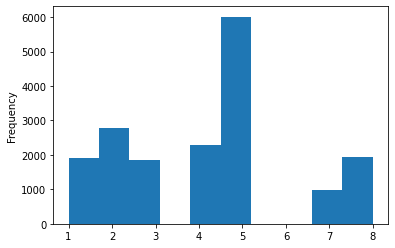

In [38]:
merged_left['incubation_day'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

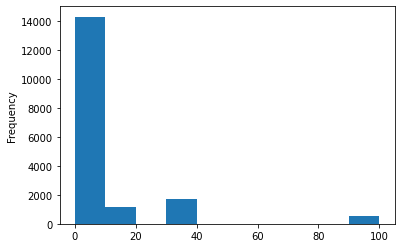

In [39]:
merged_left['dilution_factor'].plot.hist()

In [22]:
merged_left['optical_density'].describe()

count    17740.000000
mean         3.749223
std          5.798444
min          0.000000
25%          0.215000
50%          0.699000
75%          3.400000
max         15.000000
Name: optical_density, dtype: float64

<AxesSubplot:ylabel='Density'>

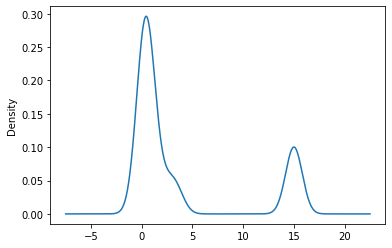

In [26]:
merged_left['optical_density'].plot.kde()

In [35]:
q1, q2, q3, q4 = merged_left['optical_density'].quantile(0), merged_left['optical_density'].quantile(.25), merged_left['optical_density'].quantile(.5), merged_left['optical_density'].quantile(.75)

In [36]:
print(f"{q1}, {q2}, {q3}, {q4} ")

0.0, 0.215, 0.699, 3.4 


In [37]:
merged_left['optical_density_bin'] = pd.cut(merged_left.optical_density, bins=[q1, q2, q3, q4, np.inf], labels=False, right=False) + 1
merged_left['optical_density_bin'].nunique()

4

<AxesSubplot:ylabel='Frequency'>

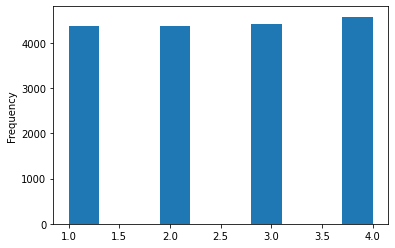

In [25]:
merged_left['optical_density_bin'].plot.hist()

In [41]:
merged_left['incub_day_dilu_fact'] = merged_left['incubation_day'].astype(str) + "_" + merged_left['dilution_factor'].astype(str)
merged_left['incub_day_dilu_fact'].nunique()

16

In [42]:
merged_left['incub_day_dilu_fact_optical_bin'] = merged_left['incubation_day'].astype(str) + "_" + merged_left['dilution_factor'].astype(str) + "_" + merged_left['optical_density_bin'].astype(str)
merged_left['incub_day_dilu_fact_optical_bin'].nunique() 

23

# Train test split with stratify

In [120]:
stratify_col="dilution_factor"

In [121]:
from sklearn.model_selection import train_test_split
split_array=merged_left[["file_name",stratify_col]]

In [122]:
split_array=split_array.drop_duplicates()
split_array

,file_name,dilution_factor
0,7 c4 from agar plate 100mL bottle d1 20x undil...,0
88,6 c3 from agar plate 100mL bottle d1 20x undil...,0
205,5 c2 from agar plate 100mL bottle d1 20x undil...,0
404,4 c1 from agar plate 100mL bottle d1 20x undil...,0
575,2 c0.7L d5 20x 100xdilut OD15.jpg,100
...,...,...
17197,79.jpg,30
17250,78.jpg,10
17363,77.jpg,100
17414,76.jpg,30


In [123]:
# Split images into train & test sets
train, test = train_test_split(
    split_array, test_size=0.2, random_state=42, stratify=split_array[stratify_col]
)   

In [124]:
train[stratify_col].value_counts()

0      41
30     12
5      10
100     9
10      7
Name: dilution_factor, dtype: int64

In [125]:
train

,file_name,dilution_factor
7490,31.jpg,0
16964,80.jpg,10
16765,82.jpg,10
15128,91.jpg,30
205,5 c2 from agar plate 100mL bottle d1 20x undil...,0
...,...,...
14937,94.jpg,100
14971,93.jpg,30
10191,42.jpg,5
9640,47.jpg,0


<AxesSubplot:ylabel='Frequency'>

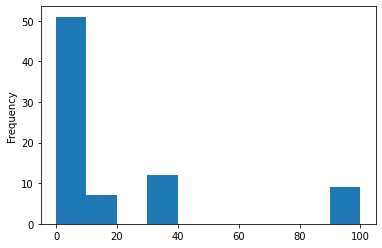

In [126]:
train[stratify_col].plot.hist()

<AxesSubplot:ylabel='Frequency'>

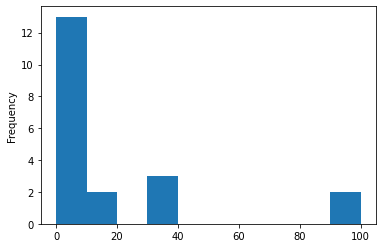

In [127]:
test[stratify_col].plot.hist()

In [128]:
train[stratify_col].value_counts(normalize=True) * 100

0      51.898734
30     15.189873
5      12.658228
100    11.392405
10      8.860759
Name: dilution_factor, dtype: float64

In [129]:
test[stratify_col].value_counts(normalize=True) * 100

0      55.0
30     15.0
10     10.0
5      10.0
100    10.0
Name: dilution_factor, dtype: float64

# Train test split without stratify

In [130]:
# Split images into train & test sets
train, test = train_test_split(
    split_array, test_size=0.2, random_state=42
)   

In [131]:
train

,file_name,dilution_factor
10256,40.jpg,5
13206,60.jpg,10
12987,62.jpg,0
5601,17.jpg,0
9257,50.jpg,0
...,...,...
11722,70.jpg,30
13302,59.jpg,5
5465,18.jpg,0
16894,81.jpg,30


<AxesSubplot:ylabel='Frequency'>

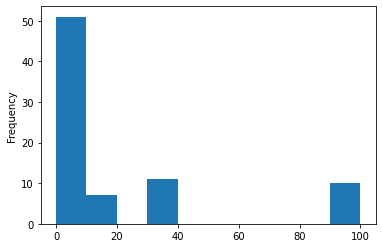

In [132]:
train[stratify_col].plot.hist()

<AxesSubplot:ylabel='Frequency'>

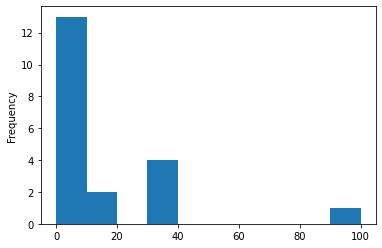

In [133]:
test[stratify_col].plot.hist()

In [134]:
train[stratify_col].value_counts(normalize=True) * 100

0      53.164557
30     13.924051
100    12.658228
5      11.392405
10      8.860759
Name: dilution_factor, dtype: float64

In [135]:
test[stratify_col].value_counts(normalize=True) * 100

0      50.0
30     20.0
5      15.0
10     10.0
100     5.0
Name: dilution_factor, dtype: float64

In [140]:
train[stratify_col].value_counts()

0      42
30     11
100    10
5       9
10      7
Name: dilution_factor, dtype: int64

In [144]:
train[train[stratify_col]==10]

,file_name,dilution_factor
13206,60.jpg,10
16507,84.jpg,10
13155,61.jpg,10
8149,55.jpg,10
16765,82.jpg,10
16964,80.jpg,10
16307,86.jpg,10


In [146]:
train.columns

Index(['file_name', 'dilution_factor'], dtype='object')

# 2. Preprocess for Tile image

In [ ]:
# Note: can be used in def generate_image_tiles(self) -> None: function if orig_allimagename is required.
# Create orig_allimagename.csv containing all original image filename with annotation and save to const.TILE_DATA_DIR_PATHS path.


# # Extract all valid original image filename with annotations for metadata logging purpose.
# df_concat_list = self._convert_raw_annotations(False)
# concatenated_df = pd.concat(df_concat_list, ignore_index=True)
# self._make_dir(const.TILE_DATA_DIR_PATHS)
# orig_allimagename_csv = Path(
#     const.TILE_DATA_DIR_PATHS, "orig_allimagename.csv",
# )
# pd.DataFrame(concatenated_df.file_name.unique()).to_csv(
#     orig_allimagename_csv, header=None, index=None
# )

In [148]:
# orig_allimagename_csv = Path(
#     const.TILE_DATA_DIR_PATHS, "orig_allimagename.csv",
# )
orig_allimagename_csv='/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/orig_allimagename.csv'
orig_allimagename=pd.read_csv(orig_allimagename_csv)
orig_allimagename

,7 c4 from agar plate 100mL bottle d1 20x undilut.jpg
0,6 c3 from agar plate 100mL bottle d1 20x undil...
1,5 c2 from agar plate 100mL bottle d1 20x undil...
2,4 c1 from agar plate 100mL bottle d1 20x undil...
3,2 c0.7L d5 20x 100xdilut OD15.jpg
4,1 c0.7L d5 20x undilut OD15.jpg
...,...
93,79.jpg
94,78.jpg
95,77.jpg
96,76.jpg


# Combine all images and create a dataframe

In [156]:
tile_file_path_list=["/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 1-7 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 8-24 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 25-35 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 36-55 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 56-75 revised/annotations/instances_default.json"
 ,"/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 76-100 revised/annotations/instances_default.json"]

In [157]:
tile_df_concat_list = []

#_convert_raw_annotations
for annot_file_path in tile_file_path_list:
    coco_annotations = _load_coco_annotations(annot_file_path)

    image_info = coco_annotations["images"]
    df_images = pd.DataFrame(image_info)
    df_images.set_index("id", inplace=True)
    # df_images.drop(
    #     labels=["license", "flickr_url", "coco_url", "date_captured"],
    #     axis=1,
    #     inplace=True,
    # )

    categories_mapping = coco_annotations["categories"]
    df_cat = pd.DataFrame(categories_mapping)
    df_cat.rename(mapper={"name": "category_name"}, axis=1, inplace=True)
    df_cat.drop(labels=["supercategory"], axis=1, inplace=True)

    annotations = coco_annotations["annotations"]
    print(f"Number of annotations: {len(annotations)}")
    df_annot = pd.DataFrame(annotations)
    df_annot.set_index("id", inplace=True)
    df_annot.drop(
        # labels=["segmentation", "iscrowd", "attributes"], axis=1, inplace=True
        labels=["segmentation", "iscrowd"],
        axis=1,
        inplace=True,
    )

    final_df = df_annot.merge(df_images, left_on="image_id", right_on="id")
    final_df = final_df.merge(df_cat, left_on="category_id", right_on="id")
    final_df.drop(labels=["id"], axis=1, inplace=True)
    tile_df_concat_list.append(final_df)

Number of annotations: 1010
Number of annotations: 4374
Number of annotations: 1981
Number of annotations: 4889
Number of annotations: 5335
Number of annotations: 5261


In [158]:
display(tile_file_path_list)

['/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 1-7 revised/annotations/instances_default.json',
 '/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 8-24 revised/annotations/instances_default.json',
 '/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 25-35 revised/annotations/instances_default.json',
 '/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 36-55 revised/annotations/instances_default.json',
 '/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 56-75 revised/annotations/instances_default.json',
 '/Users/dylanpoh/Documents/AIsingapore/GitHub/data/tile_processed/images 76-100 revised/annotations/instances_default.json']

In [165]:
concatenated_df = pd.concat(tile_df_concat_list, ignore_index=True)
concatenated_df


,image_id,bbox,category_id,area,height,width,file_name,category_name
0,1,"[598, 595, 13, 11]",1,143,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells
1,1,"[172, 524, 10, 10]",1,100,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells
2,1,"[294, 493, 17, 16]",1,272,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells
3,1,"[344, 382, 13, 14]",1,182,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells
4,1,"[220, 344, 9, 10]",1,90,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells
...,...,...,...,...,...,...,...,...
22845,170,"[455, 443, 41, 37]",3,1517,640,640,78_512_0_1152_640.jpg,cell accumulation (large cells)
22846,174,"[455, 3, 41, 37]",3,1517,640,640,78_512_440_1152_1080.jpg,cell accumulation (large cells)
22847,178,"[372, 446, 38, 37]",3,1406,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells)
22848,178,"[481, 62, 26, 22]",3,572,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells)


In [166]:
concatenated_df.shape

(22850, 8)

In [167]:
len(concatenated_df.file_name.unique())

783

# split the filname to match the original filename.

In [177]:
concatenated_df["file_name_split"] = concatenated_df.file_name.str.rsplit("_", n=4, expand=True)[0]
concatenated_df


,image_id,bbox,category_id,area,height,width,file_name,category_name,file_name_split
0,1,"[598, 595, 13, 11]",1,143,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
1,1,"[172, 524, 10, 10]",1,100,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
2,1,"[294, 493, 17, 16]",1,272,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
3,1,"[344, 382, 13, 14]",1,182,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
4,1,"[220, 344, 9, 10]",1,90,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut
...,...,...,...,...,...,...,...,...,...
22845,170,"[455, 443, 41, 37]",3,1517,640,640,78_512_0_1152_640.jpg,cell accumulation (large cells),78
22846,174,"[455, 3, 41, 37]",3,1517,640,640,78_512_440_1152_1080.jpg,cell accumulation (large cells),78
22847,178,"[372, 446, 38, 37]",3,1406,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells),77
22848,178,"[481, 62, 26, 22]",3,572,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells),77


In [178]:
merged_df = pd.merge(
    left=concatenated_df,
    right=df_metadata[selected_col],
    how="left",
    left_on="file_name_split",
    right_on="Filename",
)

In [183]:
merged_df

,image_id,bbox,category_id,area,height,width,file_name,category_name,file_name_split,Filename,incubation_day,dilution_factor,optical_density
0,1,"[598, 595, 13, 11]",1,143,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
1,1,"[172, 524, 10, 10]",1,100,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
2,1,"[294, 493, 17, 16]",1,272,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
3,1,"[344, 382, 13, 14]",1,182,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
4,1,"[220, 344, 9, 10]",1,90,640,640,7 c4 from agar plate 100mL bottle d1 20x undil...,Cells,7 c4 from agar plate 100mL bottle d1 20x undilut,7 c4 from agar plate 100mL bottle d1 20x undilut,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22845,170,"[455, 443, 41, 37]",3,1517,640,640,78_512_0_1152_640.jpg,cell accumulation (large cells),78,78,7,10,0.707
22846,174,"[455, 3, 41, 37]",3,1517,640,640,78_512_440_1152_1080.jpg,cell accumulation (large cells),78,78,7,10,0.707
22847,178,"[372, 446, 38, 37]",3,1406,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells),77,77,8,100,0.688
22848,178,"[481, 62, 26, 22]",3,572,640,640,77_512_0_1152_640.jpg,cell accumulation (large cells),77,77,8,100,0.688


In [181]:
merged_df.isnull().sum().sum()

0

In [190]:
len(merged_df.columns)

13

In [193]:
print(merged_df[merged_df.columns[10:13]].nunique())
for name in merged_df.columns[10:13]: 
    print(f'{name} : {merged_df[name].unique()}')

incubation_day      7
dilution_factor     5
optical_density    64
dtype: int64
incubation_day : [1 5 3 2 4 8 7]
dilution_factor : [  0 100   5  10  30]
optical_density : [0.    0.15  0.655 0.66  0.132 0.092 0.131 0.46  0.25  0.431 0.498 2.155
 0.47  0.525 0.575 0.78  0.49  0.585 0.186 0.192 0.208 0.219 0.93  0.96
 1.04  1.095 0.237 0.699 2.925 0.532 0.178 0.572 0.685 0.755 1.5   0.7
 0.815 0.79  0.293 0.502 0.215 0.499 0.144 0.437 0.206 0.631 0.18  0.56
 0.58  0.155 0.466 3.4   0.12  0.34  0.371 0.937 0.297 0.367 0.944 0.26
 0.707 0.688 0.242 0.16 ]


<AxesSubplot:ylabel='Frequency'>

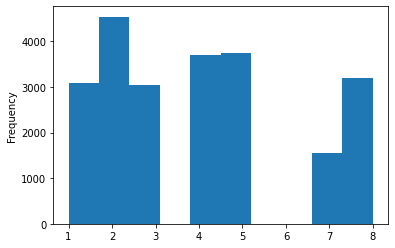

In [194]:
merged_df['incubation_day'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

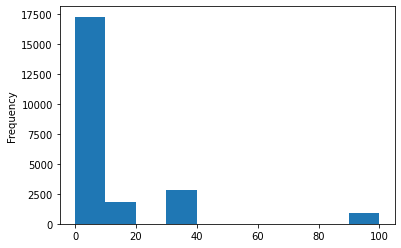

In [195]:
merged_df['dilution_factor'].plot.hist()

In [196]:
merged_df['optical_density'].describe()

count    22850.000000
mean         0.825472
std          0.989734
min          0.000000
25%          0.000000
50%          0.575000
75%          0.937000
max          3.400000
Name: optical_density, dtype: float64

<AxesSubplot:ylabel='Density'>

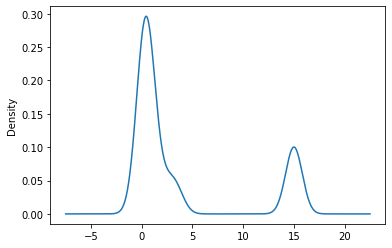

In [ ]:
merged_left['optical_density'].plot.kde()

In [197]:
q1, q2, q3, q4 = merged_df['optical_density'].quantile(0), merged_df['optical_density'].quantile(.25), merged_df['optical_density'].quantile(.5), merged_df['optical_density'].quantile(.75)

In [198]:
print(f"{q1}, {q2}, {q3}, {q4} ")

0.0, 0.0, 0.575, 0.937 


In [199]:
merged_df['optical_density_bin'] = pd.cut(merged_df.optical_density, bins=[q1, q2, q3, q4, np.inf], labels=False, right=False) + 1
merged_df['optical_density_bin'].nunique()

ValueError: Bin edges must be unique: array([0.   , 0.   , 0.575, 0.937,   inf]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [200]:
merged_df['optical_density_bin'].plot.hist()

KeyError: 'optical_density_bin'

In [201]:
merged_df['incub_day_dilu_fact'] = merged_df['incubation_day'].astype(str) + "_" + merged_df['dilution_factor'].astype(str)
merged_df['incub_day_dilu_fact'].nunique()

16

In [202]:
merged_df['incub_day_dilu_fact_optical_bin'] = merged_df['incubation_day'].astype(str) + "_" + merged_df['dilution_factor'].astype(str) + "_" + merged_df['optical_density_bin'].astype(str)
merged_df['incub_day_dilu_fact_optical_bin'].nunique() 

KeyError: 'optical_density_bin'

# Train test split with stratify

In [203]:
stratify_col="dilution_factor"

In [204]:
from sklearn.model_selection import train_test_split
split_array=merged_df[["file_name",stratify_col]]

In [205]:
split_array=split_array.drop_duplicates()
split_array

,file_name,dilution_factor
0,7 c4 from agar plate 100mL bottle d1 20x undil...,0
16,7 c4 from agar plate 100mL bottle d1 20x undil...,0
38,7 c4 from agar plate 100mL bottle d1 20x undil...,0
53,7 c4 from agar plate 100mL bottle d1 20x undil...,0
68,7 c4 from agar plate 100mL bottle d1 20x undil...,0
...,...,...
22672,100_1280_0_1920_640.jpg,100
22677,100_0_440_640_1080.jpg,100
22686,100_512_440_1152_1080.jpg,100
22695,100_1024_440_1664_1080.jpg,100


In [206]:
# Split images into train & test sets
train, test = train_test_split(
    split_array, test_size=0.2, random_state=42, stratify=split_array[stratify_col]
)   

In [207]:
train[stratify_col].value_counts()

0      326
30      96
5       76
100     70
10      58
Name: dilution_factor, dtype: int64

In [208]:
train

,file_name,dilution_factor
15531,61_1280_440_1920_1080.jpg,10
17789,98_1280_0_1920_640.jpg,100
1049,16_1280_440_1920_1080.jpg,0
6767,29_1024_0_1664_640.jpg,0
11830,36_512_0_1152_640.jpg,0
...,...,...
15558,60_512_0_1152_640.jpg,10
15540,60_0_0_640_640.jpg,10
7124,26_512_0_1152_640.jpg,5
6188,32_512_440_1152_1080.jpg,0


<AxesSubplot:ylabel='Frequency'>

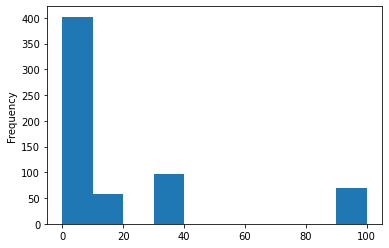

In [209]:
train[stratify_col].plot.hist()

<AxesSubplot:ylabel='Frequency'>

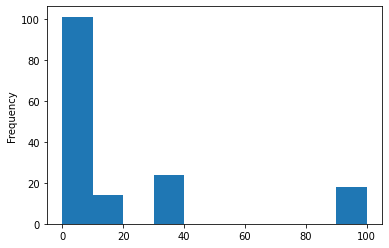

In [210]:
test[stratify_col].plot.hist()

In [211]:
train[stratify_col].value_counts(normalize=True) * 100

0      52.076677
30     15.335463
5      12.140575
100    11.182109
10      9.265176
Name: dilution_factor, dtype: float64

In [212]:
test[stratify_col].value_counts(normalize=True) * 100

0      52.229299
30     15.286624
5      12.101911
100    11.464968
10      8.917197
Name: dilution_factor, dtype: float64

# Train test split without stratify

In [213]:
# Split images into train & test sets
train, test = train_test_split(
    split_array, test_size=0.2, random_state=42
)   

In [214]:
train

,file_name,dilution_factor
19394,88_1024_0_1664_640.jpg,0
2903,19_1024_0_1664_640.jpg,0
7070,28_1280_440_1920_1080.jpg,0
1026,18_512_0_1152_640.jpg,0
22643,100_0_0_640_640.jpg,100
...,...,...
1052,15_512_0_1152_640.jpg,0
1954,23_1024_0_1664_640.jpg,5
7491,55_1280_440_1920_1080.jpg,10
12271,57_1280_0_1920_640.jpg,0


<AxesSubplot:ylabel='Frequency'>

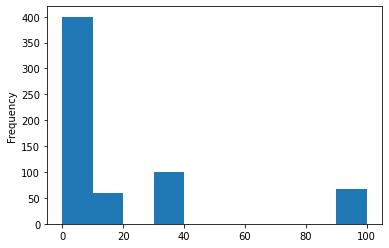

In [215]:
train[stratify_col].plot.hist()

<AxesSubplot:ylabel='Frequency'>

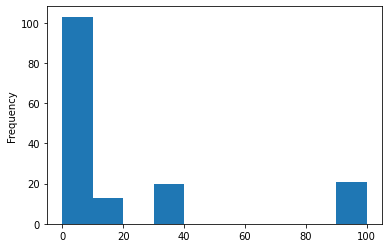

In [216]:
test[stratify_col].plot.hist()

In [217]:
train[stratify_col].value_counts(normalize=True) * 100

0      51.118211
30     15.974441
5      12.779553
100    10.702875
10      9.424920
Name: dilution_factor, dtype: float64

In [218]:
test[stratify_col].value_counts(normalize=True) * 100

0      56.050955
100    13.375796
30     12.738854
5       9.554140
10      8.280255
Name: dilution_factor, dtype: float64

In [219]:
train[stratify_col].value_counts()

0      320
30     100
5       80
100     67
10      59
Name: dilution_factor, dtype: int64

In [220]:
train[train[stratify_col]==10]

,file_name,dilution_factor
15531,61_1280_440_1920_1080.jpg,10
7387,55_512_0_1152_640.jpg,10
21721,80_1280_0_1920_640.jpg,10
15469,61_512_0_1152_640.jpg,10
21010,84_0_440_640_1080.jpg,10
17481,56_1280_440_1920_1080.jpg,10
15482,61_1024_0_1664_640.jpg,10
15598,60_1280_0_1920_640.jpg,10
20567,86_512_0_1152_640.jpg,10
15508,61_512_440_1152_1080.jpg,10


In [221]:
train.columns

Index(['file_name', 'dilution_factor'], dtype='object')